## Understanding PCA step by step

In [2]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_breast_cancer

In [3]:
cancer=load_breast_cancer(as_frame=True)
df = cancer.frame

In [4]:
df.shape

(569, 31)

In [6]:
# extracting features
X = df[cancer['feature_names']]
X.shape

(569, 30)

In [7]:
X_mean = X.mean()
X_std = X.std()
Z = (X-X_mean)/X_std

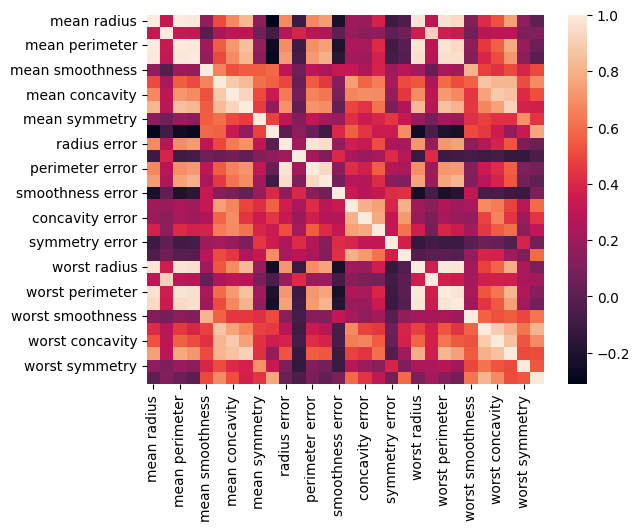

In [9]:
c = Z.cov()
import matplotlib.pyplot as plt
import seaborn as sns
sns.heatmap(c)
plt.show()

In [10]:
eigenvalues, eigenvectors = np.linalg.eig(c)
print('Eigen values:\n', eigenvalues)
print('Eigen values Shape:', eigenvalues.shape)
print('Eigen Vector Shape:', eigenvectors.shape)

Eigen values:
 [1.32816077e+01 5.69135461e+00 2.81794898e+00 1.98064047e+00
 1.64873055e+00 1.20735661e+00 6.75220114e-01 4.76617140e-01
 4.16894812e-01 3.50693457e-01 2.93915696e-01 2.61161370e-01
 2.41357496e-01 1.57009724e-01 9.41349650e-02 7.98628010e-02
 5.93990378e-02 5.26187835e-02 4.94775918e-02 1.33044823e-04
 7.48803097e-04 1.58933787e-03 6.90046388e-03 8.17763986e-03
 1.54812714e-02 1.80550070e-02 2.43408378e-02 2.74394025e-02
 3.11594025e-02 2.99728939e-02]
Eigen values Shape: (30,)
Eigen Vector Shape: (30, 30)


In [12]:
# Index the eigenvalues in descending order 
idx = eigenvalues.argsort()[::-1]
 
# Sort the eigenvalues in descending order 
eigenvalues = eigenvalues[idx]
 
# sort the corresponding eigenvectors accordingly
eigenvectors = eigenvectors[:,idx]

In [13]:
explained_var = np.cumsum(eigenvalues) / np.sum(eigenvalues)
explained_var

array([0.44272026, 0.63243208, 0.72636371, 0.79238506, 0.84734274,
       0.88758796, 0.9100953 , 0.92598254, 0.93987903, 0.95156881,
       0.961366  , 0.97007138, 0.97811663, 0.98335029, 0.98648812,
       0.98915022, 0.99113018, 0.99288414, 0.9945334 , 0.99557204,
       0.99657114, 0.99748579, 0.99829715, 0.99889898, 0.99941502,
       0.99968761, 0.99991763, 0.99997061, 0.99999557, 1.        ])

In [20]:
n_components = np.argmax(explained_var >= 0.50) + 1
n_components

2

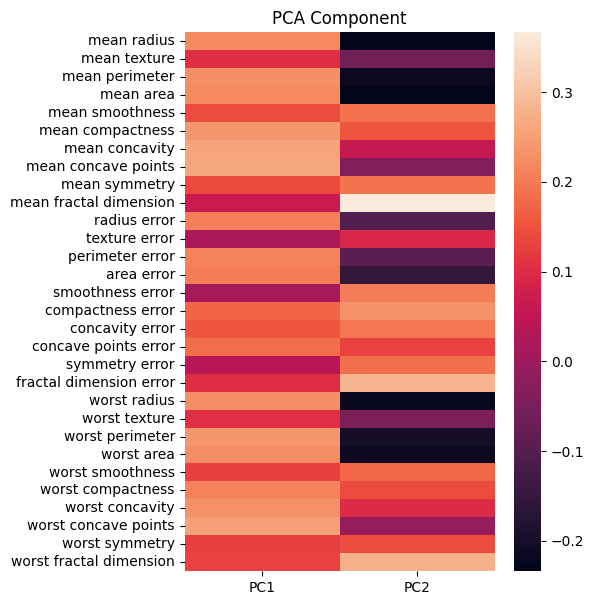

In [22]:
u = eigenvectors[:,:n_components]
pca_component = pd.DataFrame(u,
                             index = cancer['feature_names'],
                             columns = ['PC1','PC2']
                            )
 
# plotting heatmap
plt.figure(figsize =(5, 7))
sns.heatmap(pca_component)
plt.title('PCA Component')
plt.show()

In [23]:
# Matrix multiplication or dot Product
Z_pca = Z @ pca_component
# Rename the columns name
Z_pca.rename({'PC1': 'PCA1', 'PC2': 'PCA2'}, axis=1, inplace=True)
# Print the  Pricipal Component values
print(Z_pca)

          PCA1       PCA2
0     9.184755   1.946870
1     2.385703  -3.764859
2     5.728855  -1.074229
3     7.116691  10.266556
4     3.931842  -1.946359
..         ...        ...
564   6.433655  -3.573673
565   3.790048  -3.580897
566   1.255075  -1.900624
567  10.365673   1.670540
568  -5.470430  -0.670047

[569 rows x 2 columns]


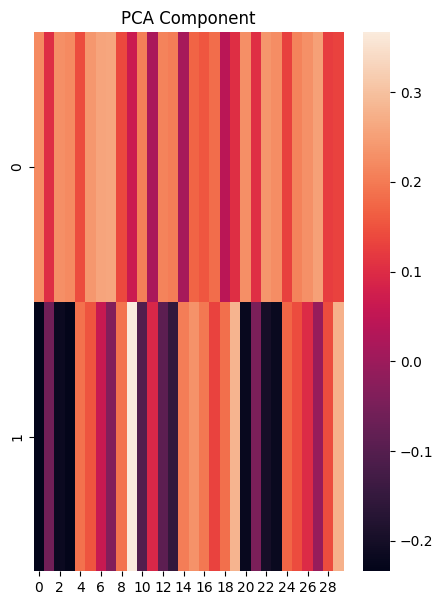

In [26]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(Z)
x_pca = pca.transform(Z)
df_pca1 = pd.DataFrame(x_pca, columns = ['PC{}'.format(i+1) for i in range(n_components)])
plt.figure(figsize =(5, 7))
sns.heatmap(pca.components_)
plt.title('PCA Component')
plt.show()

In [27]:
x_pca

array([[ 9.18475521,  1.94687003],
       [ 2.38570263, -3.76485906],
       [ 5.72885549, -1.07422859],
       ...,
       [ 1.25507494, -1.90062436],
       [10.36567336,  1.67054021],
       [-5.4704299 , -0.67004722]])

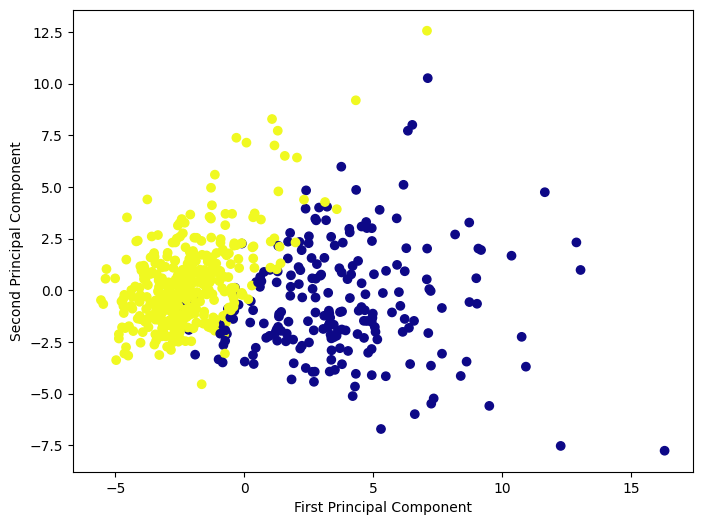

In [28]:

# giving a larger plot
plt.figure(figsize=(8, 6))
 
plt.scatter(x_pca[:, 0], x_pca[:, 1],
            c=cancer['target'],
            cmap='plasma')
 
# labeling x and y axes
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.show()

From the above plot we can say we can cluster, classify the cancer target variable using the two Principal components eaily. The fact now we can visualise it and get a feel of it makes PCA analysis special. 

In [29]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns;sns.set()

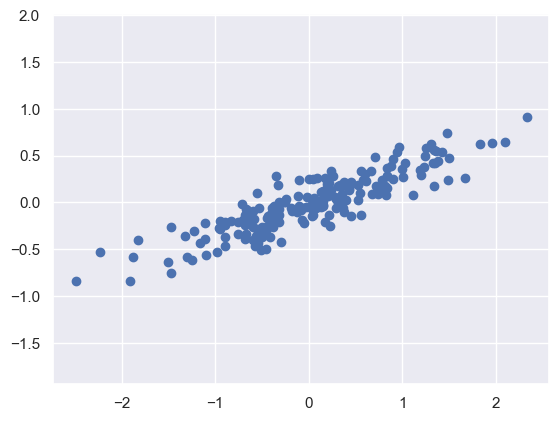

In [53]:
rng = np.random.RandomState(1)
X = np.dot(rng.rand(2,2), rng.randn(2, 200)).T
plt.scatter(X[:,0], X[:,1])
plt.axis('equal');

In [54]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(X)


PCA(n_components=2)

In [55]:
print(pca.components_)

[[-0.94446029 -0.32862557]
 [-0.32862557  0.94446029]]


In [56]:
print(pca.explained_variance_)

[0.7625315 0.0184779]


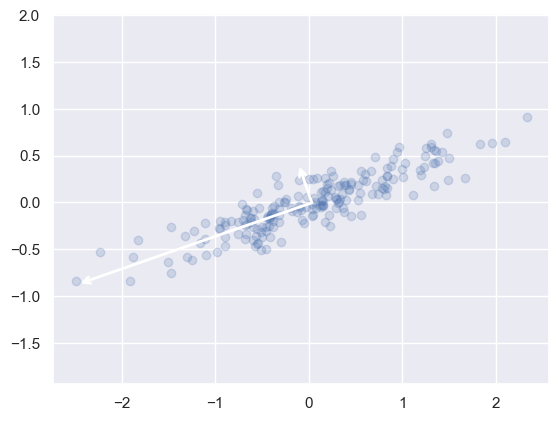

In [57]:
def draw_vector(v0, v1, ax=None):
    ax = ax or plt.gca()
    arrowprops=dict(arrowstyle='->',
    linewidth=2,
    shrinkA=0, shrinkB=0)
    ax.annotate('', v1, v0, arrowprops=arrowprops)

plt.scatter(X[:, 0], X[:, 1], alpha=0.2)
for length, vector in zip(pca.explained_variance_, pca.components_):
    v = vector * 3 * np.sqrt(length)
    draw_vector(pca.mean_, pca.mean_ + v)
plt.axis('equal');

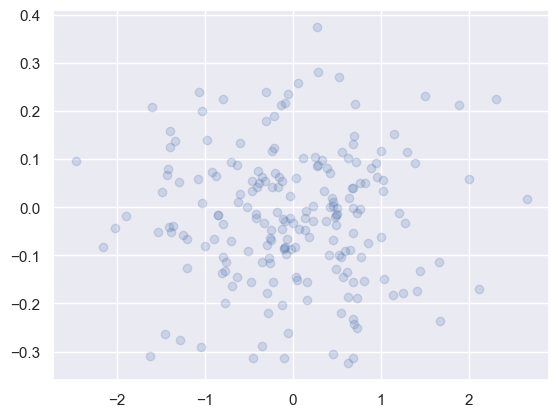

In [60]:
transformed_X = pca.inverse_transform(X)
transformed_X
plt.scatter(transformed_X[:, 0], transformed_X[:, 1], alpha=0.2)
# for length, vector in zip(pca.explained_variance_, pca.components_):
#     v = vector * 3 * np.sqrt(length)
#     draw_vector(pca.mean_, pca.mean_ + v)
# plt.axis('equal');

### PCA as dimensionality reduction

In [43]:
pca = PCA(n_components=1)
pca.fit(X)
X_pca = pca.transform(X)
print("original shape:", X.shape)
print("Transformed shape:", X_pca.shape)

original shape: (200, 2)
Transformed shape: (200, 1)


(-2.731158226766438, 2.609901883259332, -0.967276570638931, 1.006064230853995)

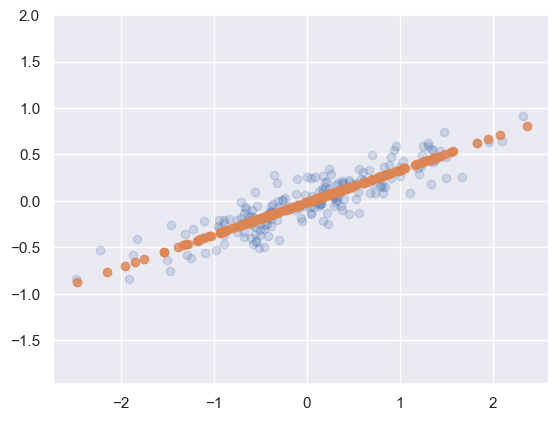

In [45]:
X_new = pca.inverse_transform(X_pca)
plt.scatter(X[:,0], X[:,1], alpha=0.2)
plt.scatter(X_new[:,0],X_new[:,1], alpha=0.8)
plt.axis("equal")


All the points have been transformed into an dimension with single axis. X_new have variance only along the pca axis (component)

## PCA Visualisation for digits dataset

In [61]:
from sklearn.datasets import load_digits
digits = load_digits()
digits.data.shape

(1797, 64)

In [69]:
projected[0]

array([-1.25946788, 21.27488287])

In [62]:
pca = PCA(2)
projected = pca.fit_transform(digits.data)
print(digits.data.shape)
print(projected.shape)

(1797, 64)
(1797, 2)


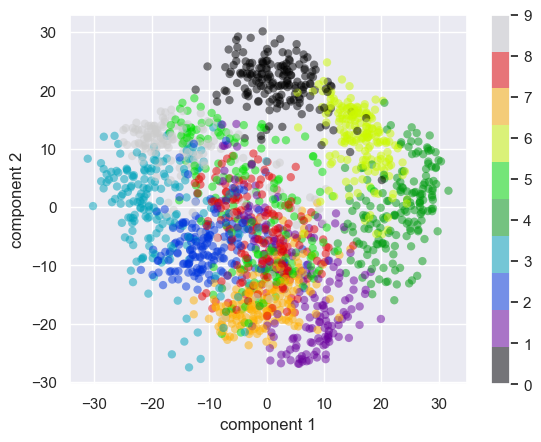

In [64]:
plt.scatter(projected[:, 0], projected[:, 1],
c=digits.target, edgecolor='none', alpha=0.5,
cmap=plt.cm.get_cmap('nipy_spectral', 10))
plt.xlabel('component 1')
plt.ylabel('component 2')
plt.colorbar();

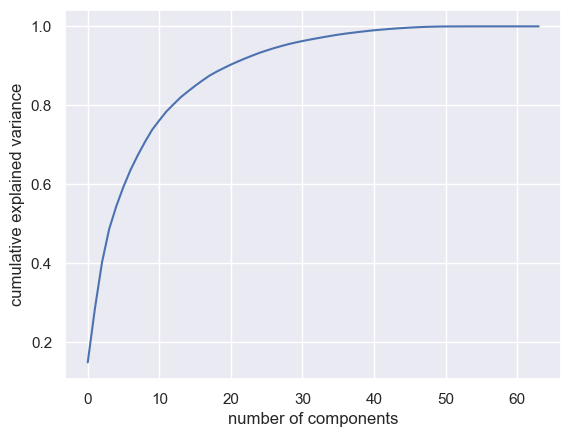

In [70]:
pca = PCA().fit(digits.data)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');

### PCA for noise filtering

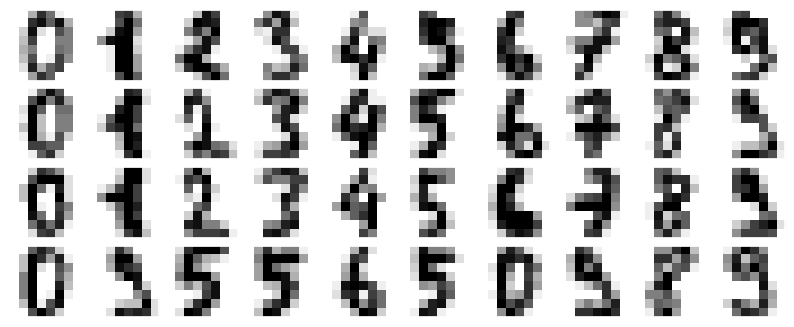

In [71]:
def plot_digits(data):
    fig, axes = plt.subplots(4, 10, figsize=(10, 4),
    subplot_kw={'xticks':[], 'yticks':[]},
    gridspec_kw=dict(hspace=0.1, wspace=0.1))
    for i, ax in enumerate(axes.flat):
        ax.imshow(data[i].reshape(8, 8),
        cmap='binary', interpolation='nearest',
        clim=(0, 16))
plot_digits(digits.data)

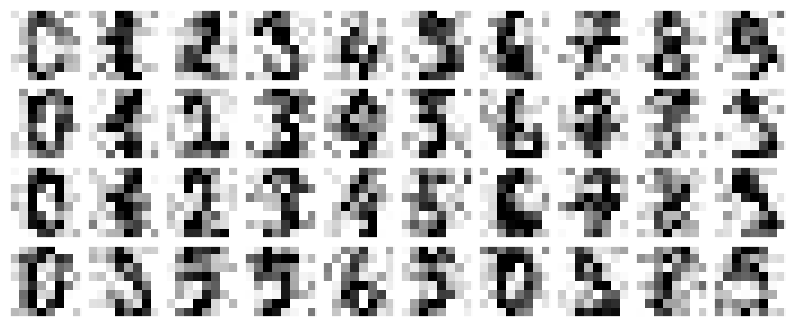

In [72]:
np.random.seed(42)
noisy = np.random.normal(digits.data, 4)
plot_digits(noisy)

In [73]:
pca = PCA(0.50).fit(noisy)
pca.n_components_

12

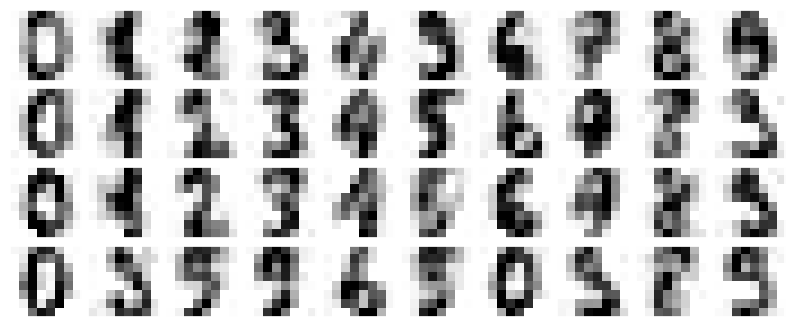

In [74]:
components = pca.transform(noisy)
filtered = pca.inverse_transform(components)
plot_digits(filtered)

### Example:EigenFaces

In [75]:
from sklearn.datasets import fetch_lfw_people
faces = fetch_lfw_people(min_faces_per_person=60)
print(faces.target_names)
print(faces.images.shape)

['Ariel Sharon' 'Colin Powell' 'Donald Rumsfeld' 'George W Bush'
 'Gerhard Schroeder' 'Hugo Chavez' 'Junichiro Koizumi' 'Tony Blair']
(1348, 62, 47)


In [93]:
from sklearn.decomposition import PCA
pca = PCA(150)
pca.fit(faces.data)

PCA(n_components=150)

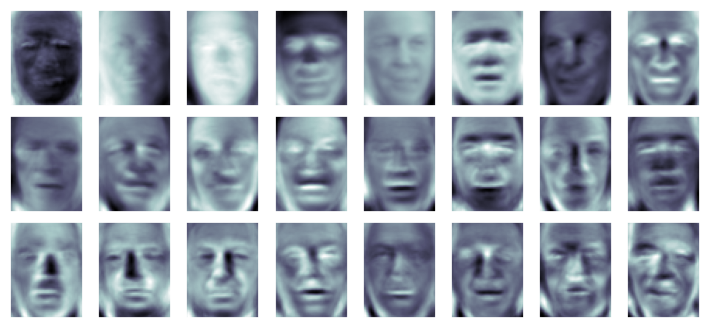

In [94]:
fig, axes = plt.subplots(3, 8, figsize=(9, 4),
    subplot_kw={'xticks':[], 'yticks':[]},
    gridspec_kw=dict(hspace=0.1, wspace=0.1))
for i, ax in enumerate(axes.flat):
    ax.imshow(pca.components_[i].reshape(62, 47), cmap='bone')

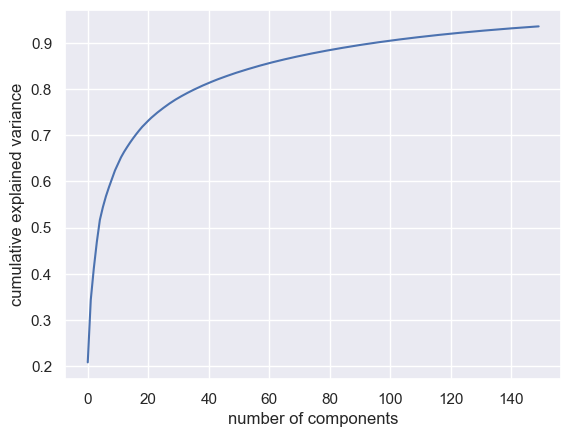

In [96]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');

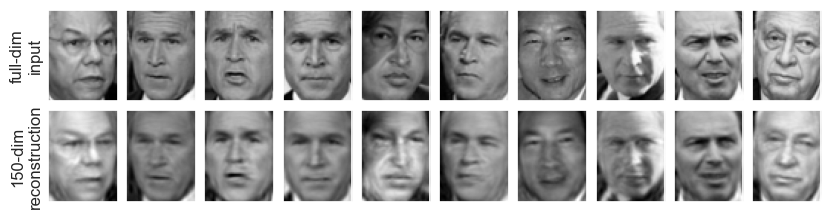

In [102]:
# Compute the components and projected faces
# pca = RandomizedPCA(150).fit(faces.data)
components = pca.transform(faces.data)
projected = pca.inverse_transform(components)

fig, ax = plt.subplots(2, 10, figsize=(10, 2.5),
    subplot_kw={'xticks':[], 'yticks':[]},
    gridspec_kw=dict(hspace=0.1, wspace=0.1))
for i in range(10):
    ax[0, i].imshow(faces.data[i].reshape(62, 47), cmap='binary_r')
    ax[1, i].imshow(projected[i].reshape(62, 47), cmap='binary_r')
    ax[0, 0].set_ylabel('full-dim\ninput')
    ax[1, 0].set_ylabel('150-dim\nreconstruction');